In [6]:
#Import statements
import pandas as pd
import numpy as np
from prophet import Prophet
import plotly.express as px

# Read data, then set the index to be the date
# NOTE: make the file a single line!!
data = pd.read_csv("https://github.com/dustywhite7/econ8310-assignment1/raw/main/assignment_data_train.csv")

In [2]:
data

,Timestamp,year,month,day,hour,trips
0,2018-01-01 00:00:00,2018,1,1,0,16714
1,2018-01-01 01:00:00,2018,1,1,1,19041
2,2018-01-01 02:00:00,2018,1,1,2,16590
3,2018-01-01 03:00:00,2018,1,1,3,12626
4,2018-01-01 04:00:00,2018,1,1,4,8739
...,...,...,...,...,...,...
8755,2018-12-31 19:00:00,2018,12,31,19,14876
8756,2018-12-31 20:00:00,2018,12,31,20,14434
8757,2018-12-31 21:00:00,2018,12,31,21,14116
8758,2018-12-31 22:00:00,2018,12,31,22,10729


In [3]:
data['datetime'] = pd.to_datetime(data['Timestamp'], 
	format='%Y-%m-%d %H:%M:%S')
data.set_index(pd.DatetimeIndex(data['Timestamp']), 
	inplace=True)

In [5]:
# Plot the data
px.line(data, x='Timestamp', y='trips',
       labels = {
           'datetime' : 'Date',
           'logpm' : 'Logged Pollution Level'
       })

In [8]:
data

,Timestamp,year,month,day,hour,trips
0,2018-01-01 00:00:00,2018,1,1,0,16714
1,2018-01-01 01:00:00,2018,1,1,1,19041
2,2018-01-01 02:00:00,2018,1,1,2,16590
3,2018-01-01 03:00:00,2018,1,1,3,12626
4,2018-01-01 04:00:00,2018,1,1,4,8739
...,...,...,...,...,...,...
8755,2018-12-31 19:00:00,2018,12,31,19,14876
8756,2018-12-31 20:00:00,2018,12,31,20,14434
8757,2018-12-31 21:00:00,2018,12,31,21,14116
8758,2018-12-31 22:00:00,2018,12,31,22,10729


In [13]:
data2 = data[['Timestamp','trips']]
data2.columns = ['ds','y']

In [14]:
# Initialize Prophet instance and fit to data

model = Prophet(changepoint_prior_scale=0.5, daily_seasonality = True )
# Higher prior values will tend toward overfitting
#     Lower values will tend toward underfitting

modelFit = model.fit(data2)

20:32:47 - cmdstanpy - INFO - Chain [1] start processing
20:32:50 - cmdstanpy - INFO - Chain [1] done processing


In [21]:
# Create timeline for 1 year in future, 
#   then generate predictions based on that timeline

future = modelFit.make_future_dataframe(periods=744, freq =' H')
pred = modelFit.predict(future)

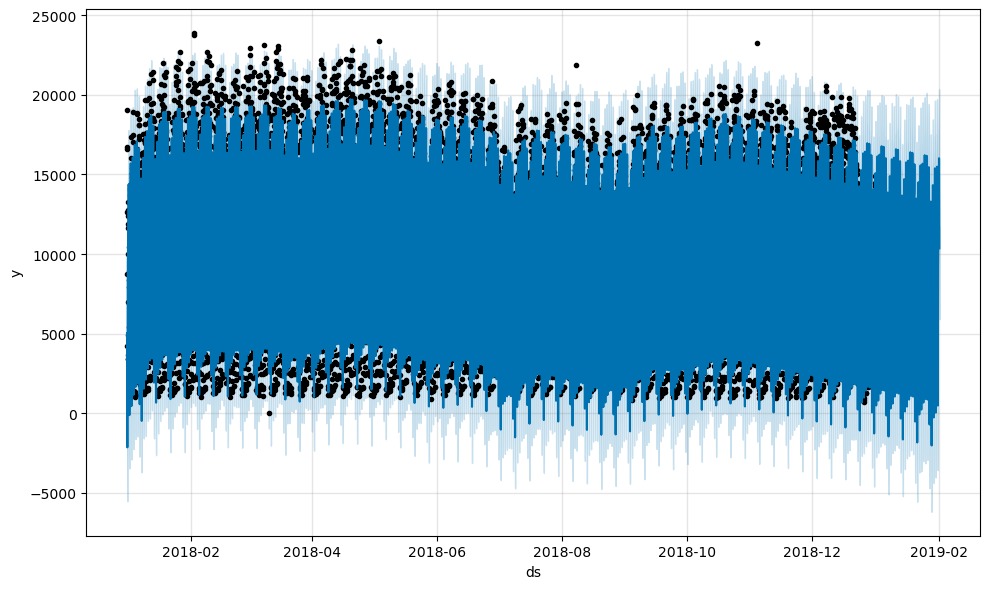

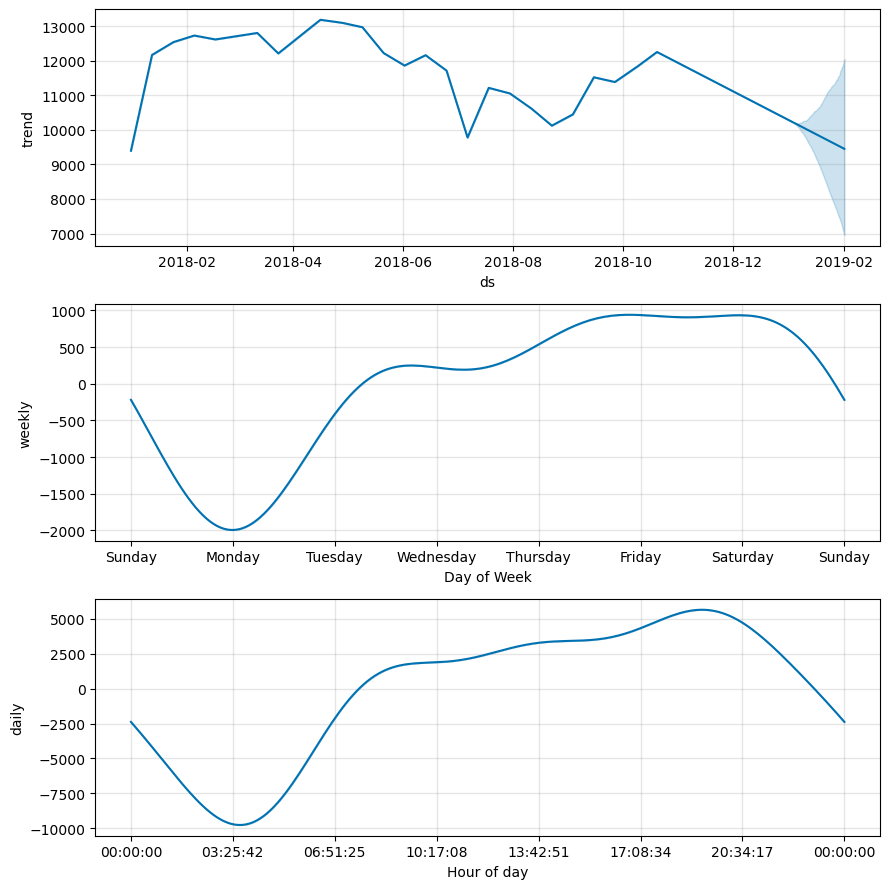

In [22]:
# Create plots of forecast and truth, 
#   as well as component breakdowns of the trends

plt = modelFit.plot(pred)
plt.savefig("prophet.png")

comp = modelFit.plot_components(pred)

In [23]:
pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01 00:00:00,9395.236405,1597.450715,8433.167769,9395.236405,9395.236405,-4374.749865,-4374.749865,-4374.749865,-2381.787049,-2381.787049,-2381.787049,-1992.962816,-1992.962816,-1992.962816,0.0,0.0,0.0,5020.486540
1,2018-01-01 01:00:00,9405.127969,-836.142446,5771.202166,9405.127969,9405.127969,-6924.058324,-6924.058324,-6924.058324,-4936.271513,-4936.271513,-4936.271513,-1987.786811,-1987.786811,-1987.786811,0.0,0.0,0.0,2481.069645
2,2018-01-01 02:00:00,9415.019533,-3334.222708,3352.418079,9415.019533,9415.019533,-9462.044719,-9462.044719,-9462.044719,-7487.775972,-7487.775972,-7487.775972,-1974.268747,-1974.268747,-1974.268747,0.0,0.0,0.0,-47.025186
3,2018-01-01 03:00:00,9424.911097,-5126.945587,1748.559543,9424.911097,9424.911097,-11302.284286,-11302.284286,-11302.284286,-9349.707728,-9349.707728,-9349.707728,-1952.576558,-1952.576558,-1952.576558,0.0,0.0,0.0,-1877.373189
4,2018-01-01 04:00:00,9434.802661,-5526.357922,1188.339463,9434.802661,9434.802661,-11576.167925,-11576.167925,-11576.167925,-9653.226038,-9653.226038,-9653.226038,-1922.941887,-1922.941887,-1922.941887,0.0,0.0,0.0,-2141.365264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9499,2019-01-31 19:00:00,9455.384771,11689.970764,20369.379691,6995.224129,12010.401078,6565.046770,6565.046770,6565.046770,5628.621013,5628.621013,5628.621013,936.425757,936.425757,936.425757,0.0,0.0,0.0,16020.431541
9500,2019-01-31 20:00:00,9454.262314,11758.534227,19990.782649,6988.283108,12020.071938,6276.336202,6276.336202,6276.336202,5337.238711,5337.238711,5337.238711,939.097491,939.097491,939.097491,0.0,0.0,0.0,15730.598516
9501,2019-01-31 21:00:00,9453.139857,10004.038719,18876.377060,6979.867591,12029.575175,5017.206393,5017.206393,5017.206393,4076.937262,4076.937262,4076.937262,940.269130,940.269130,940.269130,0.0,0.0,0.0,14470.346249
9502,2019-01-31 22:00:00,9452.017400,8223.127400,16924.334390,6969.632558,12038.877770,3102.901438,3102.901438,3102.901438,2162.780814,2162.780814,2162.780814,940.120624,940.120624,940.120624,0.0,0.0,0.0,12554.918838
